In [1]:
import os, yaml, sys
import numpy as np
import matplotlib.pyplot as plt
import time
from numba import njit
import warnings
ENV = os.getenv("MY_ENV", "dev")
with open("../../config.yaml", "r") as f:
    config = yaml.safe_load(f)
paths = config[ENV]["paths"]
sys.path.append(paths["src_path"])
from general_utils import print_wise, get_lagplot, autocorr_mat

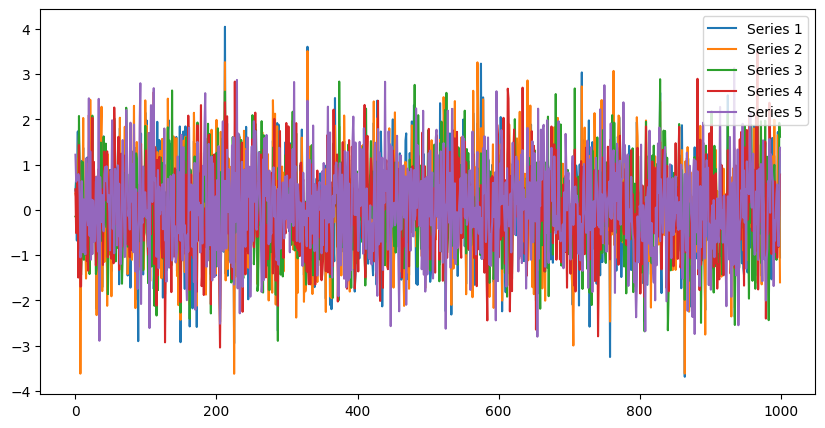

In [4]:
n = 1000     # length of each time series
d = 5         # number of time series

# Step 1: Define the desired correlation matrix (symmetric, positive definite)
R = np.array([
    [1.0, 0.8, 0.5, 0.3, 0.0],
    [0.8, 1.0, 0.4, 0.2, 0.1],
    [0.5, 0.4, 1.0, 0.6, 0.0],
    [0.3, 0.2, 0.6, 1.0, 0.2],
    [0.0, 0.1, 0.0, 0.2, 1.0]
])

# Step 2: Convert correlation matrix to covariance (std dev = 1)
cov = R

# Step 3: Draw samples from multivariate normal
data = np.random.multivariate_normal(mean=np.zeros(d), cov=cov, size=n).T

# Step 4: Check sample correlations
#sample_corr = np.corrcoef(data.T)
#print("Sample correlation matrix:\n", np.round(sample_corr, 2))

# Plot the time series
plt.figure(figsize=(10, 5))
for i in range(d):
    plt.plot(data[i, :], label=f"Series {i+1}")
plt.legend()
plt.show()

In [8]:
# Parameters
n = 200         # number of dimensions (time series)
d = 4     # number of time steps
phi = 0.8     # autocorrelation coefficient
sigma = 1.0   # noise standard deviation

# Initialize array
data = np.zeros((d, n))
print("data shape", data.shape)

# Generate noise
noise = np.random.randn(d, n) * sigma

# AR(1) recursion
for t in range(1, n):
    data[:,t] = phi * data[:,t-1] + noise[:,t]

data shape (4, 200)


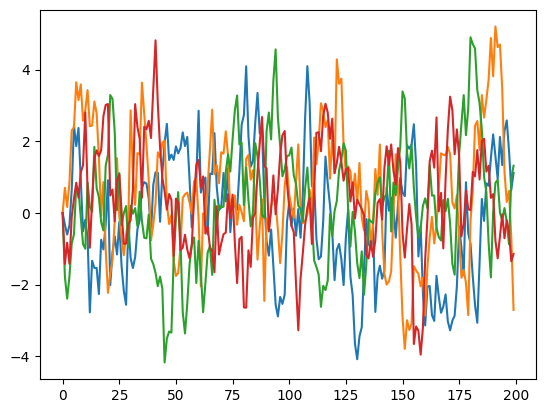

In [3]:
plt.plot(data.T) # the dimensions of our data

In [9]:
m = autocorr_mat(data)

In [10]:
lplot = get_lagplot(m, max_lag=100, min_datapts=100, symmetric=True)

19:19:02 - There are nans in corr_mat


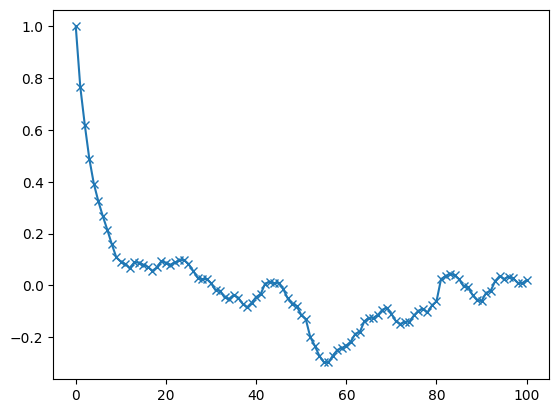

In [11]:
plt.plot(lplot, marker= "x")